# Author : Geetha Karthikesan
## G00376320@gmit.ie
## Final  Project for Machine Learning and Statistics 
## Higher Diploma in Data Analytics

## Instructions of the Project
**In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests. Your submission
must be in the form of a git repository containing, at a minimum, the following items:**

  1. Jupyter notebook that trains a model using the data set. In the notebook you
     should explain your model and give an analysis of its accuracy.
  2. Python script that runs a web service based on the model, as above.
  3. Dockerfile to build and run the web service in a container.

###### Plan for my project:
    Relationship of windenergy and turbine speed.   
    Introduce  to the contents of the power production data set.
    Statistical analysis od the data set and some plots of the data set.
    Research models that could be trained on the data set.
    Pick a model and train it on the data set in this notebook.
    Explain the model and give an analysis of its accuracy in this notebook.
    Include a python script in my repository that runs a web service based on the model.
    Design a user interface from where an end user can send a speed value via HTTP request and receive a response prediction        based on the model of power production for that wind speed.
    If time permits train more than one model in this notebook.

# Getting familiarise with relationship of wind energy and turbine speed 
Wind speed largely determines the amount of electricity generated by a turbine. Higher wind speeds generate more power because stronger winds allow the blades to rotate faster. Faster rotation translates to more mechanical power and more electrical power from the generator.Wind turbines require a minimum wind speed (generally 12-14 km/h) to begin turning and generate electricity. strong winds (50-60 km/h) to generate at full capacity. winds of less than 90 km/h; beyond that speed, the turbines must be stopped to avoid damage.
   Wind turbines work on a simple principle: instead of using electricity to make wind—like a fan—wind turbines use wind to make electricity. Wind turns the propeller-like blades of a turbine around a rotor, which spins a generator, which creates electricity. When wind speeds surpass a modern utility-scale turbine's rated wind speed, the blades begin to feather, or point into the wind to reduce their surface area. In some instances, although not common, the blades can even be locked down to ride out severe gusts.


The considered factors are wind speed, turbine swept area, air density, weather temperature, and height of tower. 
Power coefficient as a function of pitch angle and blade tip speed is also to be noted. It can be used in the 
selection of wind turbine with optimal parameters, which yield the highest amount of energy can be captured from wind.

#### Advantages of Wind Power
+  Wind power is cost-effective. 
+  Wind creates jobs. 
+  Wind enables U.S. industry growth and U.S. competitiveness. 
+  It is a clean fuel source. 
+  Wind is a domestic source of energy. 
+  Is sustainable. 

#### Disadvantages of Wind Energy
1. The wind is inconsistent. 
2. Wind turbines involve high upfront capital investment. 
3. Wind turbines have a visual impact. 
4. May reduce the local bird population. 
5. Wind turbines are prone to noise disturbances. 
6. Installation can take up a significant portion of land. 
7. Wind turbines can be a safety hazard.

> Wind Speed
Wind power is exponentially proportional to wind speed. If wind speed doubles, power generation becomes eight times greater. 
So, wind speed study of any proposed site is done extensively to ensure good returns on investment. Typically wind speeds 
are measured for a year at the site before any decision is taken.

> Height of Tower
Wind speed depends on height of the turbine from the ground. At ground level, there are many obstructions in the form of
buildings, houses, trees, etc. They obstruct smooth flow of wind and hence decrease its speed. Doubling the height of 
tower almost doubles wind power output. 

>Air Density
Wind power is directly proportional to air density. Air density is maximum at sea level. That is the reason why we have
so many wind farms near or in seas or oceans (read more about on-shore and off-shore wind farms). At higher altitude,
air density decreases significantly, so wind farms cannot be made in the mountains. Also, making the turbine taller and 
taller will not give more power.

>Betz Limit
  German physicist Albert Betz calculated in 1919 that the maximum power that a wind turbine can extract from wind is 59%. 
He derived his calculation from the conservation of momentum principle because wind is nothing but air that has momentum.
His calculations were independent of turbine design. Practically, wind turbines achieve 70-80% of the Betz Limit.Much care 
has to be taken while setting up wind farms, so that we achieve maximum utilization of wind power.

### Lets Start Looking into the data and dataset

In [5]:
pip install numpy==1.19.3

  Using cached numpy-1.19.3-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.4
    Uninstalling numpy-1.19.4:
      Successfully uninstalled numpy-1.19.4
Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing the following libraries
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
import csv
#For maths
import math as m
#import tensorflow as tf
# For linear regression.
from sklearn import linear_model

# For evaluating model performance.
from sklearn.metrics import mean_squared_error, r2_score

# For generating polynomial features in the data.
from sklearn.preprocessing import PolynomialFeatures

# For splitting data into train / test sets.
from sklearn.model_selection import train_test_split
# For support vector machine regression.
from sklearn.svm import SVR

# Want to scale the input  for SVR.
from sklearn.preprocessing import StandardScaler

# For saving/restoring models using pickle
import joblib

In [5]:
# save link to data and reference the link 
csv_url = 'https://raw.githubusercontent.com/geetharamson/MLASproject/main/dataset.csv'

In [7]:
# read the csv data into a pandas dataframe
df = pd.read_csv(csv_url)
df
# write the dataframe to csv
df.to_csv('df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   speed   500 non-null    float64
 1   power   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [8]:
# look at the top 5 rows of the DataFrame df
df.head(5)

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [9]:
# look at the last 5 rows of the DataFrame df
df.tail(5)

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


In [15]:
#returns a table that shows the number of rows and columns in a dataframe
df.shape

(500, 2)

In [8]:
#prints a description of each column of data in the data set
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


We could see that the mean speed value is 12.590 and the mean powervalue is 48.01

In [10]:
# the index or row labels of the DataFrame
df.index

RangeIndex(start=0, stop=500, step=1)

In [8]:
df.dtypes 
# the data types attributes for each column in df

speed    float64
power    float64
dtype: object

The isnull function returns no null values, yet there does appear to be null values when you look at the head and 
tail of the dataset so I need to investigate this further.Null values are not zero in Python.
(https://realpython.com/courses/python-none/)

In [12]:
print(df.isnull().sum())
df.notnull().sum()

speed    0
power    0
dtype: int64


speed    500
power    500
dtype: int64

In [9]:
df.isnull().values.any()

False

## Visualising the data and dataset

There are no null values in the dataset but there are some zero values. While there is only one zero value for the speed 
variable, there are 49 zero values for the power variable.The histogram of wind speed looks quite uniform when the default number of bins are used, spread across speeds from almost zero to 25. The wind turbine power values seem to have a peak at very low values. This is not surprising given the large number of zero power values in this dataset. Almost 10% of the power values supplied are zero. There is another peak around values of 95-100. Most of the remaining power values fall between 18 and 85. A scatter plot can show if there is any visible relationship between the two variables.

#### Plot the powerproduction data set
    Using matplotlib.pyplot to display a plot of the data in the data set

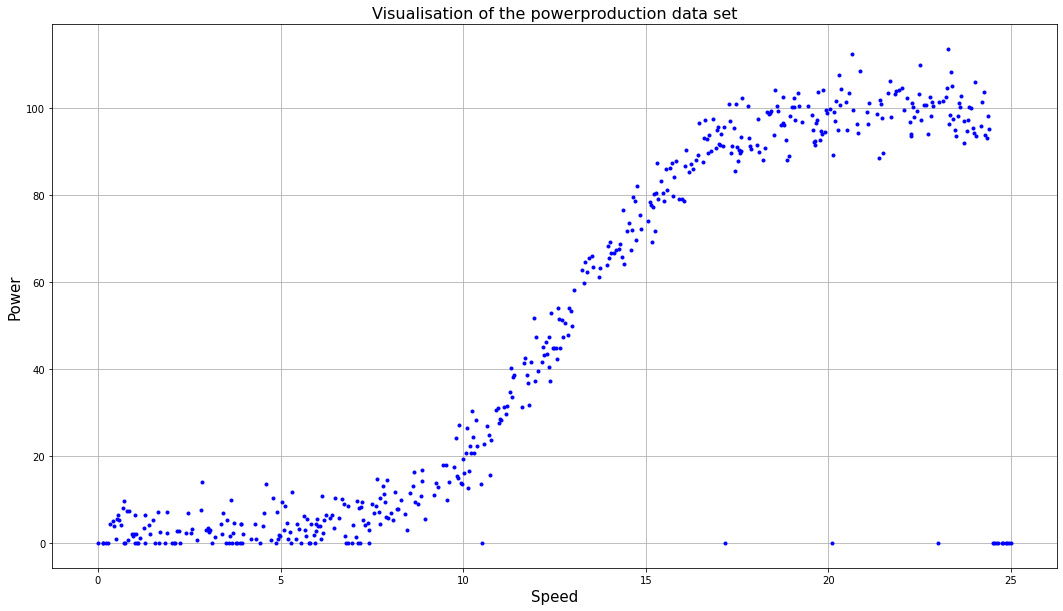

In [9]:
# matplotlib pyplot will be used for plotting the data set
import matplotlib.pyplot as plt

# rc params to customize plot appearance: https://matplotlib.org/tutorials/introductory/customizing.html
plt.rcParams['figure.figsize'] = (18, 10)
plt.rcParams['lines.linewidth'] = 2

#matplotlib.pyplot used to plot speed and power from the data set
# .b calls for blue dots in the plot
plt.plot(df['speed'], df['power'], '.b')
# add a title to the plot
plt.title('Visualisation of the powerproduction data set', fontsize=16)
# add labels to the x and y axis
plt.xlabel('Speed', fontsize=15)
plt.ylabel('Power', fontsize=15)
# display grid on the plot
plt.grid()
# show the plot
plt.show()

#### Seaborn Pairplot
Pairplot is used to plot the relationship between variables in a data set. The pairplot function by default plots 
each variable on the y axis across a single row and the x axis across a single column. Pairplot can read in a data set
from pandas df (data frame). The argument hue can be entered to add colour to the plot based on another
variable in the data set.

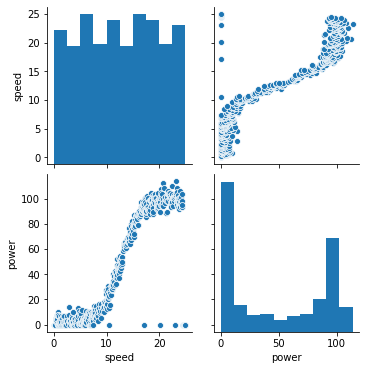

In [10]:
sns.pairplot(df)

With Seaborn pairplot a histogram is plotted by default but this can be changed by adding the diag_kind parameter which can take 3 different parameters:
  
    hist - plots a histogram    
    kde - density plot
    auto - the default when hue is selected is denisty, and if hue not selected them histogram.

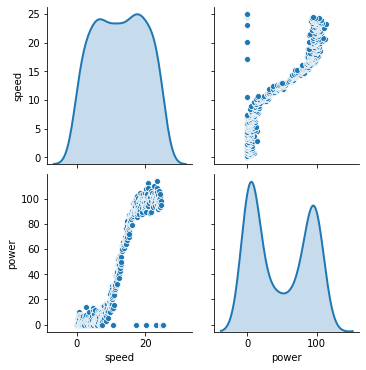

In [21]:
sns.pairplot(df, diag_kind = 'kde')

#### After looking at the above

   It looks like there are instances where zero power is generated despite high wind speeds. Possibly maintenance on the turbine caused it to be stopped at certain times.
    It looks like there is a linear relationship between wind speed and power production. The greater the wind speed the more power is produced. 
    The pyplot gives a very good visual representation of the data and so increased the size using rcparams in order to get a better look at the data points.
    For the most part it looks like the higher the wind speed the more power we could expect to be generated by the turbine.
    The amount of power generated seems to increase sharply once wind speed of over 10mph are reached.This seems to plateau between 20 and 25 mph wind speed.

### Preprocessing the data set before training a model¶

Wind power based energy is one of the most rapidly growing areas among the renewable energy sources and will continue 
to do so because of the growing concern about sustainability and emission reduction requirements.
 To make wind energy a reliable source, accurate models for predicting the power output and performance monitoring of wind turbines are needed. The theoretical power captured () by a wind turbine is given by



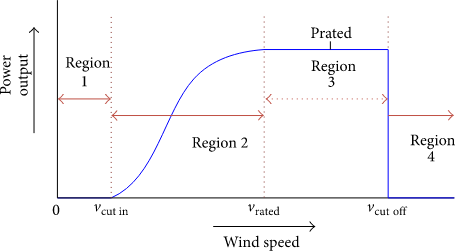

Typical power curve of a pitch regulated wind turbine.
    
   Power curve of a wind turbine, which gives the output power of turbine at a specific wind speed, provides a convenient way to model the performance of wind turbines. A typical power curve for a pitch regulated wind turbine is shown in Figure 1. In the first region when the wind speed is less than a threshold minimum, known as the cut-in speed, the power output is zero. In the second region between the cut-in and the rated speed, there is a rapid growth of power produced. In the third region, a constant output (rated) is produced until the cut-off speed is attained. Beyond this speed (region 4) the turbine is taken out of operation to protect its components from high winds; hence it produces zero power in this region.

 Formulae which state that the extractable power from the wind is given by:$$P = \frac{1}{2} \rho A v^3 C_p$$ where $\rho$ is the density of air, $A$ is the area swept by the turbines, $v$ is the wind speed, and $C_p$ is the power coefficient. Looking at this formula I would expect power to depend on $v^3$. However, $C_p$ is not static as it depends on the ratio of blade tip speed to wind speed (called $\lambda$).

Average wind speed is 12.59 m/s


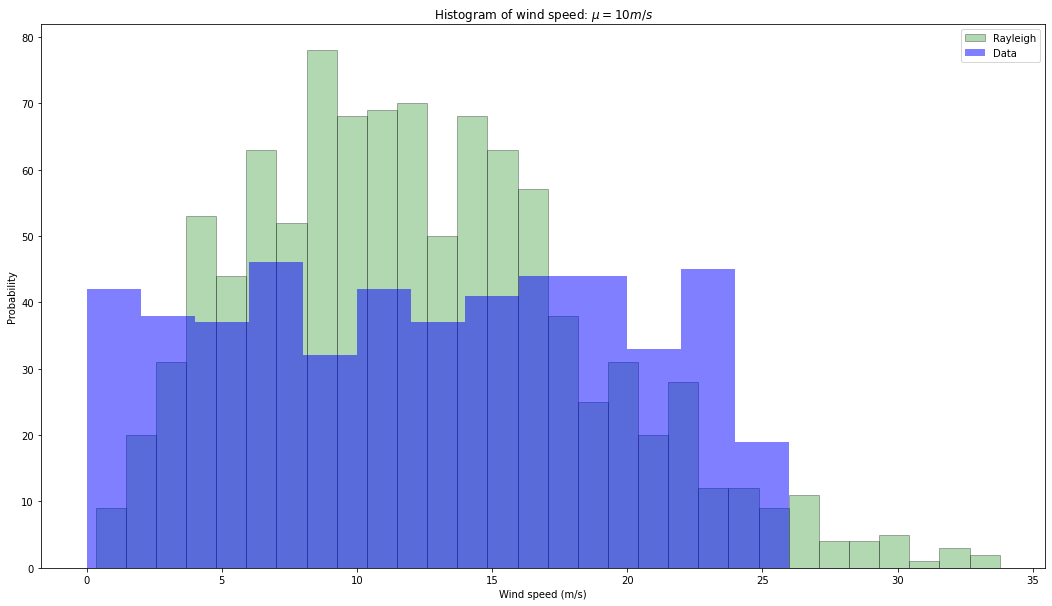

In [12]:
# Wind speeds sampled from a Rayleigh distribution, mean=12.6 m/s
# Default: numpy.random.rayleigh(scale=1.0, size=None)
data = np.random.rayleigh(10, 1000) 
plt.hist(data, bins=30, alpha = 0.3, facecolor='green', edgecolor='black', label=['Rayleigh'])

bins = np.arange(0, 30, 2) # fixed bin size
plt.hist(df['speed'], bins=bins, alpha=0.5, facecolor='blue', label=['Data'])

plt.xlabel('Wind speed (m/s)')
plt.ylabel('Probability')
plt.title('Histogram of wind speed: $\mu=10 m/s$')
plt.legend()
w = df['speed'].mean(axis=0)
print(f'Average wind speed is {w:.2f} m/s')

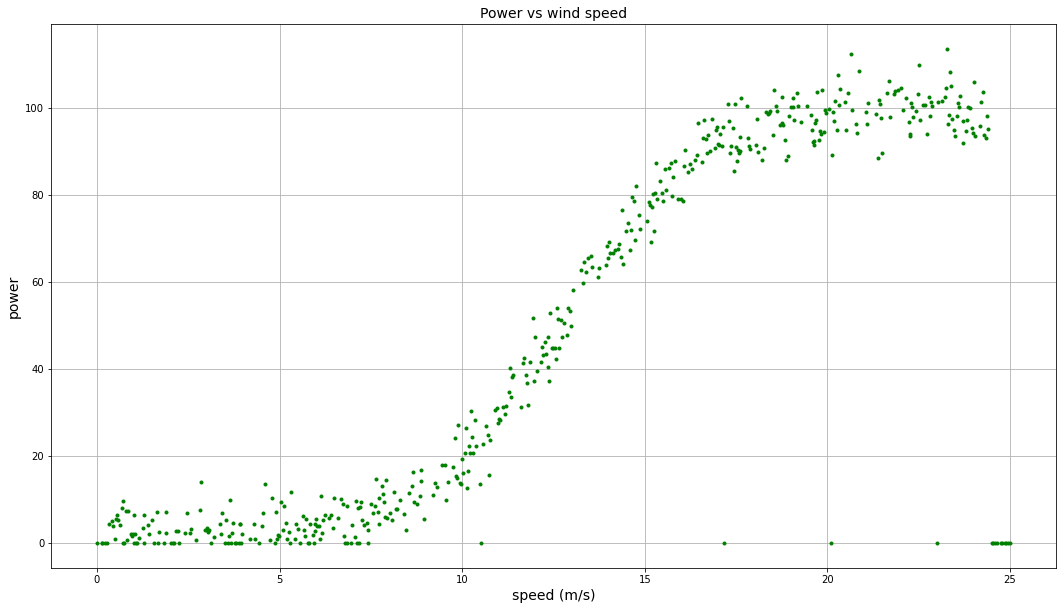

In [13]:
#checking for more relation for power and wind speed
plt.plot(df['speed'], df['power'],  '.g')
plt.title('Power vs wind speed', fontsize='14')
plt.xlabel('speed (m/s)', fontsize='14')
plt.ylabel('power', fontsize='14')
plt.grid()

Average wind speed in data is 12.59 m/s


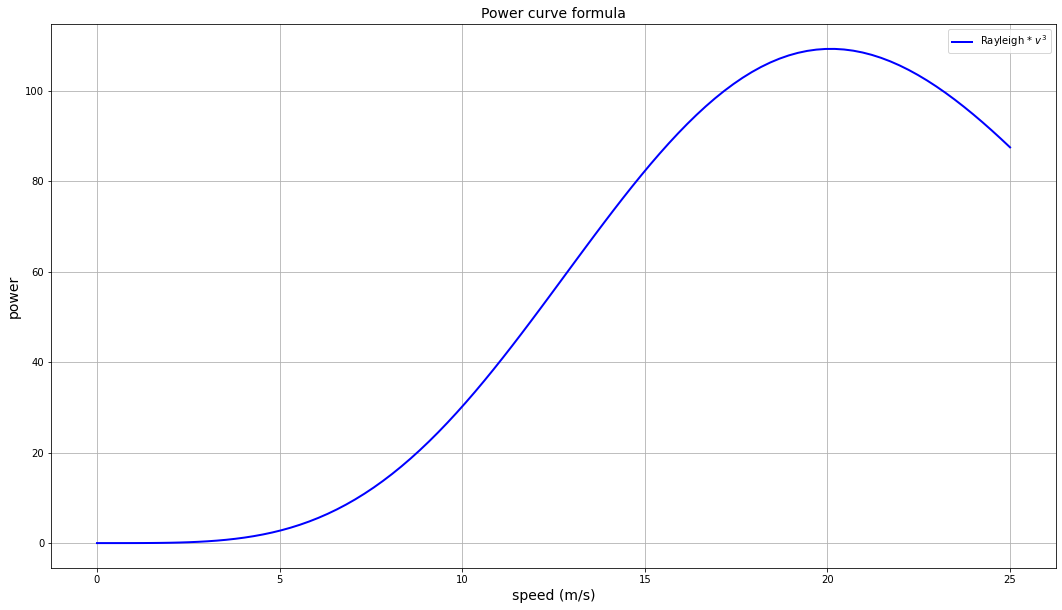

In [14]:
# # wind speed
x = np.linspace(0, 25, 100)

# speed ^3
v = np.power(x, 3)

# Try a Rayeigh distribution for the power coefficient, need scale factor sc.
# w = mean wind speed from our dataset above
print(f'Average wind speed in data is {w:.2f} m/s')

sc = w / (m.sqrt((m.pi) / 2)) # mode or scale
ray = lambda s, x: (x / s ** 2) * ( np.exp( (-x **2) / (2 * s **2) )  )

# PLot the product v^3 * Rayleigh and scale it down.
plt.plot(x, 0.5 * ray(sc, x)*v, color='b', label='Rayleigh * $v^3$')
plt.title('Power curve formula', fontsize='14')
plt.xlabel('speed (m/s)', fontsize='14')
plt.ylabel('power', fontsize='14')
plt.legend()
plt.grid()

In [22]:
# Data sorted by speed and display selections at the low and high speeds. Code adapted from
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
print("Low wind speed data group")
df.sort_values(by=['speed']).head(15)

Low wind speed data group


,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [23]:
# Data sorted by speed and display selections at the low and high speeds. Code adapted from
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html
print("High wind speed data group")
df.sort_values(by=['speed']).tail(15)

High wind speed data group


,speed,power
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223
489,24.399,95.117
490,24.499,0.000
491,24.525,0.000
492,24.575,0.000
493,24.650,0.000
494,24.750,0.000


In [24]:
# Data sorted by power and display selections of the low and high power outputs
print("Low power output data group")
df.sort_values(by=['power']).head(10)

Low power output data group


,speed,power
0,0.000,0.0
111,5.806,0.0
110,5.781,0.0
105,5.556,0.0
89,4.880,0.0
83,4.429,0.0
75,3.879,0.0
74,3.804,0.0
73,3.779,0.0
70,3.679,0.0


In [25]:
# Data sorted by power and display selections of the low and high power outputs
print("High power output data group")
df.sort_values(by=['power']).tail(10)

High power output data group


,speed,power
460,23.248,104.655
465,23.373,104.977
481,24.024,105.992
431,21.672,106.208
410,20.295,107.584
464,23.348,108.167
420,20.871,108.485
447,22.497,109.932
416,20.646,112.362
461,23.273,113.556


#### Datagroup with zero power output

In [27]:
# Display data points with 0.000 kW power and sort by speed
print("Data with 0kW power output sorted by wind speed")
df.loc[(df['power'] == 0.000)].sort_values(by=['speed'])

Data with 0kW power output sorted by wind speed


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


### Dataset Cleansing
For analytic modeling purposes, these erroneous 0.000 kW power data points should be omitted from the dataset, as they do not
appear to follow the natural relationship between wind speed and turbine power output.

In [29]:
# Remove outlier observations rows where power == 0.000
df = df.loc[(df['power'] > 0.0)]
# Descibe updated basic stats of the dataset
df.describe().round(2)

,speed,power
count,451.00,451.00
mean,13.00,53.23
std,6.84,40.52
min,0.32,0.07
25%,7.34,8.54
50%,13.04,58.17
75%,18.78,94.73
max,24.40,113.56


### Count remaining unique data

In [30]:
# Count remaining unique data observation. Code adapted from https://pyformat.info/ &
# https://chrisalbon.com/python/data_wrangling/pandas_list_unique_values_in_column/
print(f"The number of unique speed value observations is {len(df.speed.unique())}")
print(f"The number of unique power value observations is {len(df.power.unique())}")

The number of unique speed value observations is 451
The number of unique power value observations is 450


In [31]:
# Display duplicate power observation found
# Code adapted from https://stackoverflow.com/a/54050797
df[df[['power']].duplicated() == True]

,speed,power
357,17.843,91.27


#### Review duplicate value wind speed range¶

In [15]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html
# Drop duplicates values be keep the first value
df = df.drop_duplicates(subset=['power'], keep='first')
# Decribed the cleaned data
print("Basic statistics of the cleaned dataset")
df.describe().round(2)

Basic statistics of the cleaned dataset


,speed,power
count,451.00,451.00
mean,12.96,53.03
std,6.86,40.56
min,0.00,0.00
25%,7.28,8.35
50%,12.99,54.08
75%,18.78,94.73
max,24.40,113.56


In [16]:
#Code adapted from https://stackoverflow.com/a/41281750
# Describe low wind speed data points
low_speed = df.loc[(df['speed'] <= 8.0)]
print("Basic statistics of low wind speed range (less than 8m/s)")
low_speed.describe().round(2)

Basic statistics of low wind speed range (less than 8m/s)


,speed,power
count,129.00,129.00
mean,4.36,5.00
std,2.40,3.43
min,0.00,0.00
25%,2.40,2.27
50%,4.78,4.38
75%,6.36,7.05
max,7.93,14.79


In [17]:
#Code adapted from https://stackoverflow.com/a/41281750
# Describe medium wind speed data points.
med_speed = df.loc[(df['speed'] > 8.0) & (df['speed'] < 18.0)]
print("Basic statistics of medium wind speed range (greater than 8m/s and less than 18m/s)")
med_speed.describe().round(2)

Basic statistics of medium wind speed range (greater than 8m/s and less than 18m/s)


,speed,power
count,193.00,193.00
mean,13.18,54.67
std,2.85,29.72
min,8.03,3.00
25%,10.74,27.69
50%,12.99,54.08
75%,15.67,82.15
max,17.89,102.32


In [18]:
# Describe high wind speed data points
high_speed = df.loc[(df['speed'] >= 18.0)]
print("Basic statistics of high wind speed range (greater than 18m/s)")
high_speed.describe().round(2)


Basic statistics of high wind speed range (greater than 18m/s)


,speed,power
count,129.00,129.00
mean,21.24,98.61
std,1.93,4.88
min,18.04,87.98
25%,19.62,95.01
50%,21.32,98.79
75%,23.02,101.42
max,24.40,113.56


In [19]:
#Code adapted from https://stackoverflow.com/a/41281750
# Check wind speed observation that give power output between 90.0 kW and 93.0 kW.
# and sort by power values
print("wind speed that give power output in range 90.0 kW to 93.0 kW")
df.loc[(df['power'] > 90.0) & (df['power'] < 93.0)].sort_values(by=['power'])   

wind speed that give power output in range 90.0 kW to 93.0 kW


,speed,power
352,17.593,90.142
330,16.792,90.171
317,16.091,90.412
350,17.543,90.435
358,17.893,90.546
363,18.268,90.751
332,16.917,90.761
348,17.492,91.125
344,17.367,91.206
338,17.117,91.270


### Wind Speed Range Summary

In [20]:
# low,medium and high wind speed ranges. Code adpated from
# https://www.kite.com/python/answers/how-to-count-the-number-of-rows-in-a-pandas-dataframe-in-python
df_cnt = len(df.index)
low_s_cnt = len(low_speed.index)
med_s_cnt = len(med_speed.index)
high_s_cnt = len(high_speed.index)

# Print % of low medium and high wind speed ranges.
# Code adpated from https://pyformat.info/
print("The percentage of observations in low, medium and high wind speed data groups are as follows:")
print(f"Low speed range: 0 to 8 m/s = {(low_s_cnt/df_cnt)*100:.1f}%")
print(f"Medium speed range: 8 to 18 m/s = {(med_s_cnt/df_cnt)*100:.1f}%")
print(f"High speed range: 18 to 24.5 m/s = {(high_s_cnt/df_cnt)*100:.1f}%")

The percentage of observations in low, medium and high wind speed data groups are as follows:
Low speed range: 0 to 8 m/s = 28.6%
Medium speed range: 8 to 18 m/s = 42.8%
High speed range: 18 to 24.5 m/s = 28.6%


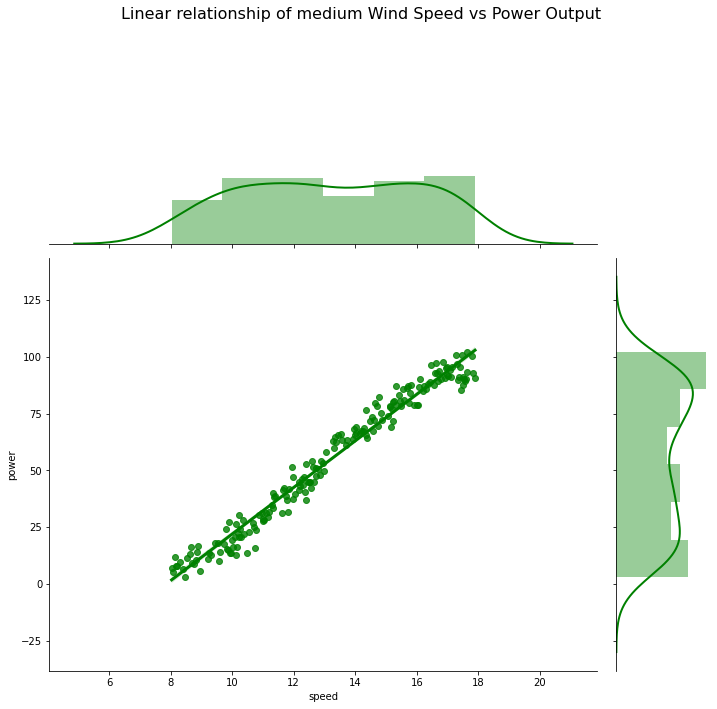

In [21]:
# Plot comparasion of medium wind speed versus power output
# Code adapted from https://seaborn.pydata.org/tutorial/distributions.html#plotting-univariate-distributions 
# and https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot
plot = sns.jointplot(x="speed", y="power", kind="reg", color="g", height=10, data=med_speed)

# Add Title adapted from https://stackoverflow.com/a/52096280
plt.subplots_adjust(top=0.75)
plt.suptitle("Linear relationship of medium Wind Speed vs Power Output", fontsize = 16)
# Display plot
plt.show()

### Descriptions of power output observation ranges

In [49]:
# Describe low power output data points
print("Basic statistics of low power output range (less than 20kW)")
df.loc[(df['power'] <= 20.0)].describe().round(2)

Basic statistics of low power output range (less than 20kW)


,speed,power
count,163.00,163.00
mean,5.42,6.61
std,2.90,4.66
min,0.32,0.07
25%,3.04,2.85
50%,5.71,5.55
75%,7.77,9.63
max,10.74,19.35


In [50]:
# Describe medium power output data points
print("Basic statistics of medium power output range (greater than 20kW and less than 85kW)")
df.loc[(df['power'] > 20.0) & (df['power'] < 85.0)].describe().round(2)

Basic statistics of medium power output range (greater than 20kW and less than 85kW)


,speed,power
count,112.00,112.00
mean,12.92,52.66
std,1.73,19.40
min,9.81,20.64
25%,11.56,37.07
50%,12.73,51.31
75%,14.41,69.24
max,16.04,84.13


In [51]:
# Describe high power output data points
print("Basic statistics of high power output range (greater than 85kW)")
df.loc[(df['power'] > 85.0)].describe().round(2)

Basic statistics of high power output range (greater than 85kW)


,speed,power
count,175.00,175.00
mean,20.09,96.80
std,2.57,5.65
min,15.32,85.17
25%,17.81,92.88
50%,19.90,97.15
75%,22.38,100.70
max,24.40,113.56


#### Findings from analysing:-
+ Wind speed needs to be greater than 0.3 m/s to generate any power.

+ Up to wind speed of 8 m/s (28% of the data observations), only limited power (mean of 5 kW) can be generated. The lower 
power is likely due to friction and resistance losses that the wind turbine need to overcome.

+ For the medium wind speed range of between 8 m/s and 18 m/s (43% of the data observations), the turbine generates power 
output directly proportional to the wind speed.

+ For a wind speed of approximately 18 m/s, the power output begins to plateau out at a mean power of approximately 100 kW,
which appear to be the maximum power output rating of the wind turbine.

+ The turbine appears to shut down and stops generating power when wind speed reaches approximately 24.5 m/s.

+ The wind speed data value range is almost uniformly distributed.

+ The power output data has a greater distribution at the low and high power output ranges.


#### Linear Regression
Looking at the data, we could probably get away with fitting a straight line to it. That would likely do a very good job of predicting output power over a certain range of input wind speeds (around 10 - 15 m/s). However, it wouldn't do a great job around the places where the power is rising more slowly (< 10 m/s) or where it is leveling off (> 15 m/s). I think I'll start with a linear model and maybe move on to polynomial regression afterwards.

In [55]:
# Take a quick look at the correlation between the dataframe columns
df.corr()

,speed,power
speed,1.000000,0.947863
power,0.947863,1.000000


(451, 1)
(451,)
Coefficients: 
 [5.60418122]
Mean squared error: 166.93
Coefficient of determination: 0.90


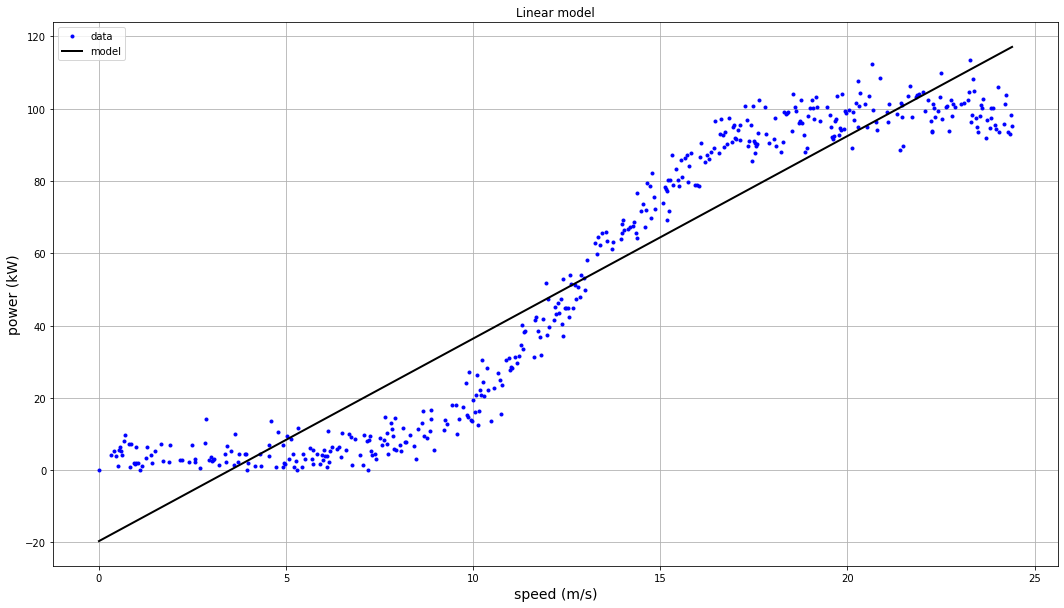

In [24]:
# From: https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
#Adapted from https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

# Create linear regression object
reg = linear_model.LinearRegression()

# Need x and y in correct format.
X = df[["speed"]] # note dimensions
y = df["power"]

print(X.shape)
print(y.shape)

# Split into training and test sets TO DO LATER

# Train the model using the training sets
reg.fit(X, y)

# Make predictions using the testing set
y_pred = reg.predict(X)

# The coefficients
print('Coefficients: \n', reg.coef_)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y, y_pred))

# Inspect the fit
plt.plot(df['speed'], df['power'],  '.b', label="data")
plt.plot(df['speed'], y_pred, 'k-', label="model")
plt.xlabel('speed (m/s)', fontsize='14')
plt.ylabel('power (kW)', fontsize='14')
plt.title("Linear model")
plt.grid()
plt.legend()

This is an example of underfitting, where the model is too simple to learn the structure of the data: a straight line 
is not a good fit to our data. One solution is to pick a more powerful model which has more parameters, so we will now try fitting a polynomial to our data. There are many possible nonlinear models. We already know that $ power \propto speed^3$, a third order polynomial might be a good place to start.

First, I'll split the data set into a training and validation part (what we have been calling test) and look at the linear model as a function of training set size. The plot below shows that the straight line is a good fit to the data (close to zero error) when there are only a few data points in the training set, but when more points are added to the training set, the error increases because a straight line is not a good fit to this data at all. The training error reaches a plateau. On the validation or test set, the model (having being trained on only a few training points) cannot generalize well at all to new data and the error is high. As more points are added to the training set, the model performs better and the validation error comes down, although it too tends towards the same limit. This learning curve is typical of a model that is underfitting. Adding more data will not help to bring down the error, but choosing a more complex model might.

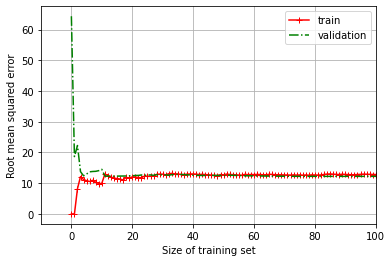

In [59]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range (1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", label="train")
    plt.plot(np.sqrt(val_errors), "g-.", label="validation")
    plt.legend()
    plt.xlabel("Size of training set")
    plt.ylabel("Root mean squared error")
    plt.grid()
    plt.xlim(-10, 100)

lin_reg = linear_model.LinearRegression()
plot_learning_curves(lin_reg, X, y)

### Model 1: Polynomial Regression
I am going to transform our simple linear model$$y = \theta_0 + \theta_1 x $$into a nonlinear one$$ y = \theta_0 + \theta_1 (x) + \theta_2 (x^2) + \theta_3 (x^3)$$We can still do linear regression using this model because it is linear in the model parameters $\theta$: $\theta_0$ is the bias term (intercept in a straight line) and the remaining $\theta$ terms are feature weights..The $x$, $x^2$, and $x^3$ are our features, which we obtain by transforming the data we were given. We use the PolynomialFeatures class in Scikit-learn to do this by adding the square and cube of our data to create the two new features.
(I got this idea from  someone suggesting in our class group, glad she posted!!)

In [25]:
# Try polynomial order 3
poly_features = PolynomialFeatures(degree=3, include_bias=False) #include_bias -> intercept

# Split the data set into train/set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Generate the new features (powers of x) for the training data
X_train_poly = poly_features.fit_transform(X_train)

# Create an instance of the model & train it using the transformed training set.
regP = linear_model.LinearRegression()
regP.fit(X_train_poly, y_train)

# Prediction for y using test data? Transform X_test first.
X_test_poly = poly_features.fit_transform(X_test)
print(X_test_poly.shape)
y_predP = regP.predict(X_test_poly)
#print(y_predP)

# The coefficients of the fit.
print(f'Coefficients: {regP.coef_}')
# Don't forget about the intercept - I did initially.
print(f'Intercept: {regP.intercept_:.2f}')

# The mean squared error
print(f'Mean squared error: {mean_squared_error(y_test, y_predP):.2f}')

# The coefficient of determination: 1 is perfect prediction
print(f'Coefficient of determination: {r2_score(y_test, y_predP):.2f}')

(91, 3)
Coefficients: [-10.529443     1.5596301   -0.04106591]
Intercept: 17.20
Mean squared error: 40.38
Coefficient of determination: 0.98


In [26]:
# Check X_train_poly to see if it's really x, x^2, x^3?
# Will need to generate these poly features when calling the model through the front end.
print(X_train_poly[0])
print(X_train_poly[0][0]**2)
print(X_train_poly[0][0]**3)

[  6.181       38.204761   236.14362774]
38.204761
236.14362774100002


In [62]:
# Predict power for a single input speed
xin = 20
out = regP.predict([[xin, xin ** 2, xin ** 3]])
print(out)
#out = regP.intercept_ + regP.coef_[0]*xin + regP.coef_[1]*(xin**2) + regP.coef_[2]*(xin**3)
print(f'For wind speed: {xin:.2f} polynomial regression predicts power  = {out[0]:.2f}')

# Inspect the fit - seems to have a y shift of about -13 (I was forgetting y intercept!)
fit = regP.intercept_ + regP.coef_[0]*df['speed'] + regP.coef_[1]*(df['speed']**2) + regP.coef_[2]*(df['speed']**3)

[102.55419548]
For wind speed: 20.00 polynomial regression predicts power  = 102.55


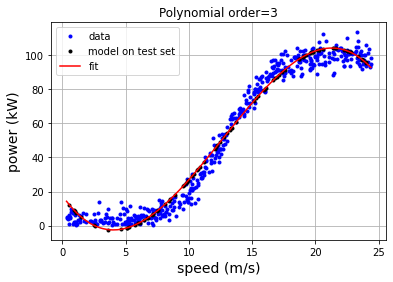

In [63]:
plt.plot(df['speed'], df['power'],  'b.', label="data")
plt.plot(X_test, y_predP, 'k.', label="model on test set")
plt.plot(df['speed'], fit, 'r-', label="fit")
plt.xlabel('speed (m/s)', fontsize='14')
plt.ylabel('power (kW)', fontsize='14')
plt.title("Polynomial order=3")
plt.grid()
plt.legend()
plt.savefig("images/poly.png")

##### Power Output Model 
power = take an average of last 20 values in cleaned data set perhaps.
Our model for power output will be:

$$ power = 17.58- 10.66 speed + 1.57 speed^2 - 0.04 speed^3$$

### Save the polynomial regression model

In [66]:
#https://joblib.readthedocs.io/en/latest/generated/joblib.dump.html
joblib.dump(regP, "Models/poly-reg.pkl")
print("Polynomial regression model saved as poly-reg.pkl")

Polynomial regression model saved as poly-reg.pkl


# Neural Network

An artificial neural network, or just a neural network, is a machine learning model inspired by the networks of biological neurons found in human brains.Each individual biological neuron is relatively simple, but because each one is connected to many thousands of others, they can perform complicated tasks when working together. With that idea replicated for machine learning, the idea of a an artificial neuron is that its output fires depending on the value of the inputs to it. This is what a threshold logic unit is based on: the output of such a unit is the weighted sum of its inputs multiplied by an step function, which acts like an on/off switch. A perceptron is a single layer of these units where each unit is connected to all the inputs. If each neuron in a layer is connected to all the neurons in a previous layer, that layer is a dense layer. A bias is also fed to each unit - I think of it like the intercept in a straight line as it allows one to apply a constant shift to the step function (or activation function in general terms). Finally, A multilayer perceptron (MLP) is obtained by stacking multiple perceptrons. A MLP has a single input layer, one or more hidden layers, and a final output layer. 
We will use the Keras API to build and train our neural networks, with the heavy computation associated with neural networks done in a backend called TensorFlow.

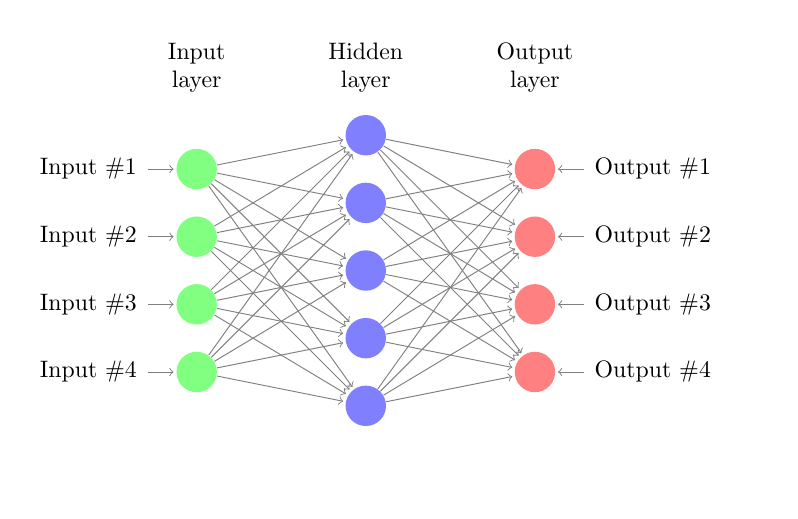

In [18]:
from IPython.display import Image 

Image("Images/Ann1.png")

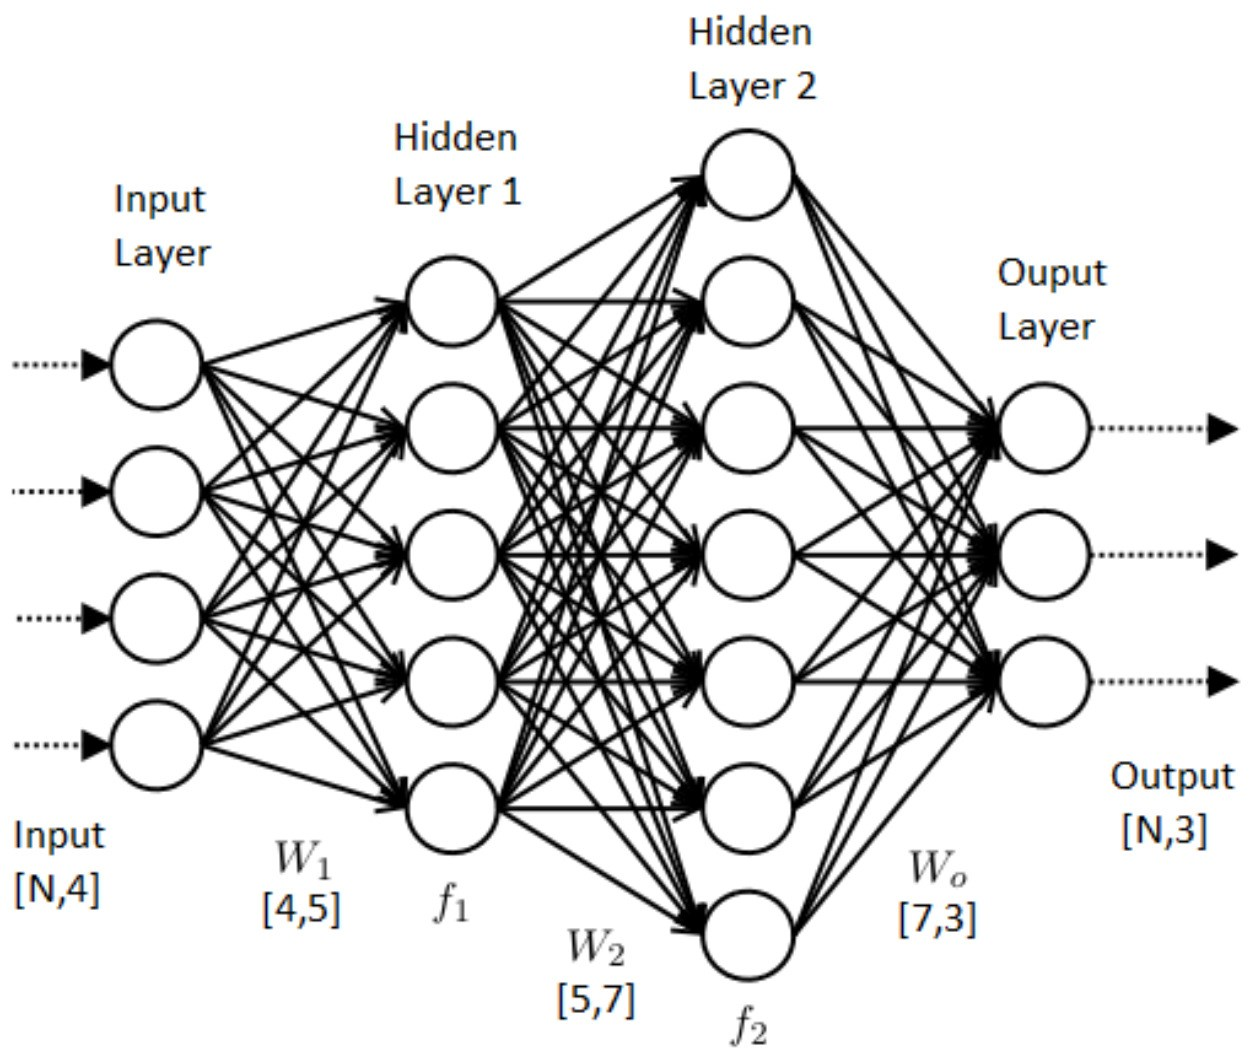

In [17]:
from IPython.display import Image 

Image("Images/Ann.png")

In [27]:
#plt.plot(df['speed'], df['power'],  '.g')
#plt.plot(X, y,  '-r')

# Split the data set into train/set. 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Take some of the training set to be a validation set. 25% of 80 = 60 
# Want train:test:validation = 60:20:20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(270, 1)
(270,)
(91, 1)
(91,)
(90, 1)
(90,)


Now we construct a neural network consisting of three layers: the input layer, a hidden layer with 50 neurons, and the output layer. The size of the input and output layers is determined by the data we have and what we want to predict. Having one hidden layer is a good default, but if there are more hidden layers, it's recommended to have the same number of neurons in each hidden layer.The more neurons there are in each hidden layer the better, but this must be balanced against increased computation time for more neurons.

##### The steps involved in building a neural network:-
+ We have one hidden layer with 50 neurons and it's a dense layer.
+ The input to it is a one-dimensional tensor (like a matrix).
+ The method of initialization for the weights and biases is also chosen here. It's important that the weights are not all set to zero initially (kernel_initializer parameter). I'll explain this a little later.
+ The activation function is a sigmoid, like a smoothed out step function that we mentioned above. The fact that it's smooth means it has a derivative, which is important when it comes to calculating loss etc in a while.
+ Our output layer has just one neuron and the activation function is linear so that the output can have any range of values.    

### Build and Train our neural network.

In this one hidden layer with 50 neurons and it's a dense layer.
The input to it is a one-dimensional tensor (like a matrix).
The method of initialization for the weights and biases is also chosen here. It's important that the weights are not all set to zero initially (kernel_initializer parameter).
The activation function is a sigmoid, like a smoothed out step function that we mentioned above. The fact that it's smooth means it has a derivative, which is important when it comes to calculating loss etc in a while.
Our output layer has just one neuron and the activation function is linear so that the output can have any range of values.

In [34]:
# Create a Sequential model incrementally via the add() method:
# kernel_initializer="glorot_uniform"
model = kr.models.Sequential()
model.add(kr.layers.Dense(50, input_shape=(1,), activation='sigmoid', kernel_initializer="glorot_uniform", bias_initializer="zeros"))
model.add(kr.layers.Dense(1, activation='linear', kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))

Once the model is designed, we must compile it to specify the learning rate and loss function, the quantity we are trying to minimize in through training of the network.

In [35]:
# Compile the model and summarize it.
model.compile(kr.optimizers.Adam(lr=0.001), loss="mean_squared_error")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                100       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


The hidden layer has 50 neurons plus 50 bias terms giving 100 parameters for this layer. The output layer has 1 neuron with one bias term and 50 inputs feeding to it, so 51 parameters in total. The network has 151 parameters. The aim is to train it and find good values for these 151 parameters.

**Fit Training Dataset to Neural Network**

The algorithm used is called backpropagation, and consists of two passes through the network, one in the forward direction and one backward. Each training example (or batch of them) is passed through each layer to the output, with the output of each layer being calculated at each stage. This is the forward pass. The output error is then calculated in the form of a loss function. The algorithm then goes through each layer in reverse, calculating how much of the error is contributed by each connection. The weights are then adjusted to reduce the error. In the backward pass the error gradient is propagated back through the network, and gradient descent is used to move in the direction of decreasing error in parameter space. The learning rate controls the step size in gradient descent.

The sigmoid activation function is used because it has a gradient (unlike the step function) and so gradient descent can work. It is important that all weights are not initialized to zero (kernel_initializer model parameter above) because we want to break symmetry in the network: if all neurons had the same weight then backpropagation would see no difference between them and training would fail. Stochastic gradient descent (SGD) is kind of the default method used to minimize the loss function, but it requires more tuning of the learning rate. The Adam optimizer (extended from SGD) we have used above is an adaptive algorithm (in that it can change the learning rate during training) so we don't need to worry about setting it, just use the default value. Glorot initialization of weights is a technique to ensure that gradients neither vanish nor explode during backpropogation.If we apply the predict method to our input X at this stage, using initialized values of biases and weights, we are performing forward propagation of our inputs through an untrained neural network. The network has not learned anything and shouldn't be able to make a sensible prediction yet.




Train the neural network on our training data.
Takes a list of x values, and a list of corresponding y values.
1st x value corresponds with 1st y value and so on.
Goes into neural network and passes x values through neural network,
To see what n net is telling us, would be the y value that it is predicting.
Compare that using means squared error to what we wnat the y val to be for corresponding x value.
What we're looking for neural net to do, is look at all the x and y values, that we have generated,
and tell us how they were generated.
It knows that we gave it x and y values, and a linear relationship between them,
because we chose a linear activation in the model above.

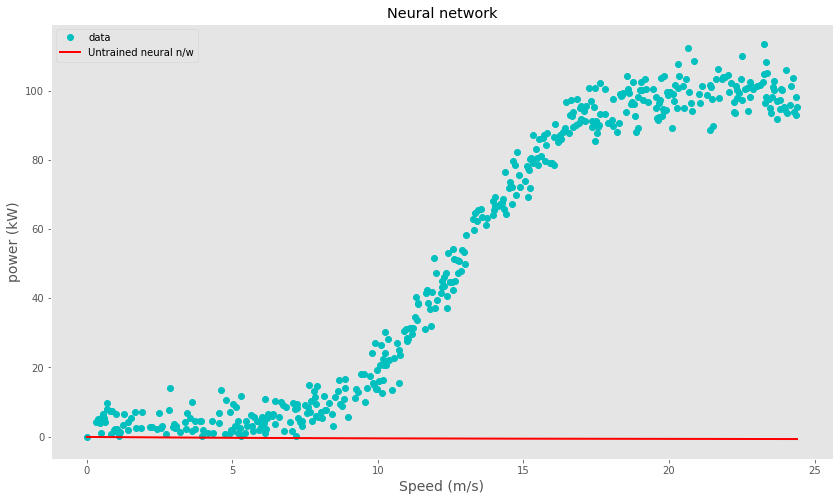

In [40]:
# Look at output with no training.
plt.plot(X, y, 'co', label="data")
plt.plot(X, model.predict(X), 'r-', label="Untrained neural n/w")
plt.xlabel('Speed (m/s)', fontsize='14')
plt.ylabel('power (kW)', fontsize='14')
plt.title("Neural network")
plt.legend()
plt.grid()


Train the network over 500 epochs - like number of iterations. We can speed up the training by doing so in batches. The parameter batch_size is the number of samples per gradient update. Gradient descent (or a variant of it) is an algorithm used to minimize the cost function at each epoch. Normal gradient descent involves all samples in the training set being used to calculate the gradient and cost function; it proceeds smoothly towards a minimum of the cost function in parameter space. SGD calculates the gradient and cost for each each epoch using one sample (randomly selected hence stochastic); it proceeds in a jagged way towards a minimum but it does so faster. Mini-batch SGD uses a small random subset of the training examples at each iteration, so it's somewhere in between gradient descent and SGD.

In [45]:
# history = model.fit(X_train, Y_train, validation_split = 0.25, batch_size=10, epochs=500)
# Train the network using the training data.
model.fit(X_train, y_train, epochs=500, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/500
27/27 [==============================] - 0s 11ms/step - loss: 4731.9414 - val_loss: 3938.8726
Epoch 2/500
27/27 [==============================] - 0s 5ms/step - loss: 4626.3096 - val_loss: 3845.7351
Epoch 3/500
27/27 [==============================] - 0s 5ms/step - loss: 4516.5244 - val_loss: 3742.7524
Epoch 4/500
27/27 [==============================] - 0s 5ms/step - loss: 4390.6733 - val_loss: 3627.2180
Epoch 5/500
27/27 [==============================] - 0s 4ms/step - loss: 4243.4922 - val_loss: 3483.5757
Epoch 6/500
27/27 [==============================] - 0s 4ms/step - loss: 4062.1116 - val_loss: 3316.3413
Epoch 7/500
27/27 [==============================] - 0s 4ms/step - loss: 3856.7205 - val_loss: 3141.2722
Epoch 8/500
27/27 [==============================] - 0s 5ms/step - loss: 3666.0605 - val_loss: 2996.8052
Epoch 9/500
27/27 [==============================] - 0s 4ms/step - loss: 3517.9924 - val_loss: 2883.7615
Epoch 10/500
27/27 [==============================] - 

27/27 [==============================] - 0s 2ms/step - loss: 128.3887 - val_loss: 125.3712
Epoch 157/500
27/27 [==============================] - 0s 2ms/step - loss: 125.3082 - val_loss: 121.4874
Epoch 158/500
27/27 [==============================] - 0s 2ms/step - loss: 123.4912 - val_loss: 121.6437
Epoch 159/500
27/27 [==============================] - 0s 2ms/step - loss: 121.6081 - val_loss: 122.1663
Epoch 160/500
27/27 [==============================] - 0s 2ms/step - loss: 119.7574 - val_loss: 114.8728
Epoch 161/500
27/27 [==============================] - 0s 2ms/step - loss: 117.0532 - val_loss: 114.8961
Epoch 162/500
27/27 [==============================] - 0s 2ms/step - loss: 116.3115 - val_loss: 112.2930
Epoch 163/500
27/27 [==============================] - 0s 2ms/step - loss: 113.4875 - val_loss: 113.9952
Epoch 164/500
27/27 [==============================] - 0s 2ms/step - loss: 111.6657 - val_loss: 110.1759
Epoch 165/500
27/27 [==============================] - 0s 2ms/step - 

27/27 [==============================] - 0s 2ms/step - loss: 41.4907 - val_loss: 41.6061
Epoch 315/500
27/27 [==============================] - 0s 2ms/step - loss: 41.0957 - val_loss: 41.6765
Epoch 316/500
27/27 [==============================] - 0s 2ms/step - loss: 40.9424 - val_loss: 41.5645
Epoch 317/500
27/27 [==============================] - 0s 2ms/step - loss: 40.7792 - val_loss: 41.1492
Epoch 318/500
27/27 [==============================] - 0s 2ms/step - loss: 40.5341 - val_loss: 40.1976
Epoch 319/500
27/27 [==============================] - 0s 2ms/step - loss: 40.3739 - val_loss: 40.6449
Epoch 320/500
27/27 [==============================] - 0s 2ms/step - loss: 40.2207 - val_loss: 40.2947
Epoch 321/500
27/27 [==============================] - 0s 2ms/step - loss: 40.3551 - val_loss: 39.4902
Epoch 322/500
27/27 [==============================] - 0s 2ms/step - loss: 39.8257 - val_loss: 39.3997
Epoch 323/500
27/27 [==============================] - 0s 2ms/step - loss: 39.7871 - va

27/27 [==============================] - 0s 2ms/step - loss: 22.4630 - val_loss: 19.5087
Epoch 473/500
27/27 [==============================] - 0s 2ms/step - loss: 22.5329 - val_loss: 19.2343
Epoch 474/500
27/27 [==============================] - 0s 2ms/step - loss: 22.5058 - val_loss: 18.9198
Epoch 475/500
27/27 [==============================] - 0s 2ms/step - loss: 22.4382 - val_loss: 19.0835
Epoch 476/500
27/27 [==============================] - 0s 2ms/step - loss: 22.5059 - val_loss: 19.0206
Epoch 477/500
27/27 [==============================] - 0s 2ms/step - loss: 22.3086 - val_loss: 18.7862
Epoch 478/500
27/27 [==============================] - 0s 2ms/step - loss: 22.3794 - val_loss: 19.1690
Epoch 479/500
27/27 [==============================] - 0s 2ms/step - loss: 22.2402 - val_loss: 19.2762
Epoch 480/500
27/27 [==============================] - 0s 2ms/step - loss: 22.1763 - val_loss: 19.0898
Epoch 481/500
27/27 [==============================] - 0s 2ms/step - loss: 22.0403 - va

Ideally, the loss calculated from the training data should be close to that calculated using the validation data (which is not used in training the model). If they differ significantly, that's a sign that something is up and some parameters may need to be changed. If the validation error is still reducing, the model hasn't converged yet and one can continue training by just running the above cell again ( I usually ran this cell twice). I hadn't fully appreciated the difference between the train/test data and the validation data, but I see it now: the training data is used to train the model, the validation data is used to measure loss during model training to see if there are problems like under or overfitting. If there are, parameters can be changed and the model re-trained. Finally, after training and tuning of parameters, the test data is used to make predictions. It has had no input to the model training or parameter tuning.

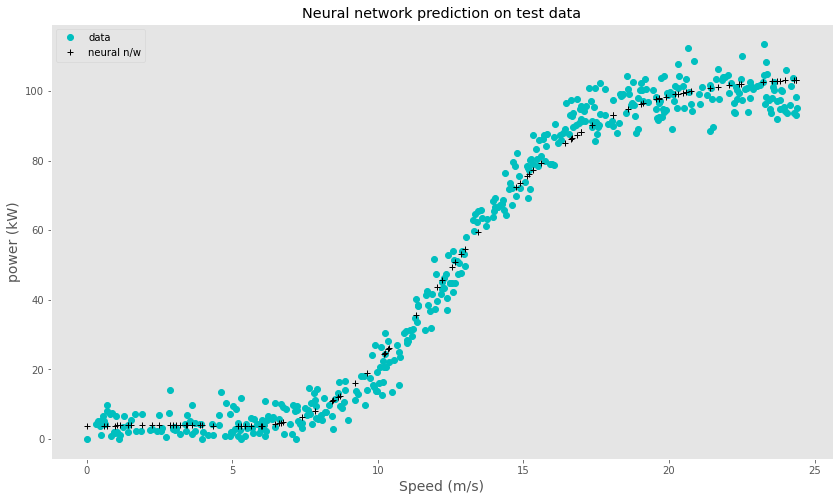

<Figure size 1008x576 with 0 Axes>

In [51]:
# Look at prediction for the test data - was not used in training.
plt.plot(X, y, 'co', label="data")
plt.plot(X_test, model.predict(X_test), 'k+', label="neural n/w")
plt.xlabel('Speed (m/s)', fontsize='14')
plt.ylabel('power (kW)', fontsize='14')
plt.title("Neural network prediction on test data")
plt.grid()
plt.legend()
plt.show()
plt.savefig("Images/neuralnetwork.png")


In [54]:
# Predict from a single input value - seems sensible.
wind = [[20]]
print(model.predict(wind))

[[98.55307]]


In [55]:
model.save("Models/neural-network.h5")
print("Neural network model saved as neural-nw.h5")

Neural network model saved as neural-nw.h5


# Summary
+ Taken a 500 values of speed, power, and started out with a neural network that knows nothing about dataset.
+ We trained the neuron. We gave it speed, and power value pairs.
+ Trained it using Neuron Network, using Keras.
+ It looked at those, and in turn has built in mechanisms, to try and mimic how you would get from x values to the y values.
+ Plotted the values from the train and validation values.
+ From our plot it looks like our model was not far off.

#### Information:
   **The world’s biggest wind turbines**
   
The SeaTitan 10MW wind turbine currently has a 190m rotor diameter, while the world’s tallest wind turbine overall is the **Nordex 3.3 MW**, with a total height of 230m.
   Bigger wind turbines can generate more power. As they have become cheaper to build, this increased power — along with other advances over the past 40 years, such as predicting wind conditions — has helped the renewable technology make up a greater percentage of the energy market.Turbine capacity is expected to continue increasing, reaching up to 10 to 15 megawatts. This could see turbine diameter reach as much as 200m long.

# REFERENCES

https://ieeexplore.ieee.org/document/8301377/references#references  [last accessed on 19/11/20]

https://www.conserve-energy-future.com/disadvantages_windenergy.php [last accessed on 19/11/20]

https://www.upsbatterycenter.com/blog/factors-affecting-wind-power-output  [last accessed on 19/11/20]

https://www.hindawi.com/journals/jen/2016/8519785/ [last accessed on 19/11/20]

https://matplotlib.org/tutorials/introductory/customizing.html[last accessed on 03/12/20]

https://seaborn.pydata.org/generated/seaborn.pairplot.html[last accessed on 03/12/20]

https://www.tensorflow.org/tutorials/keras/classification[last accessed on 03/01/21]

https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb[last accessed on 03/01/21]

https://uk.mathworks.com/help/stats/pitfalls-in-fitting-nonlinear-models-by-transforming-to-linearity.html[last accessed on 31/12/20]

https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/[last accessed on 03/01/21]

https://github.com/ianmcloughlin/jupyter-teaching-notebooks[last accessed on 03/01/21]

https://www.tensorflow.org/guide/keras/functional[last accessed on 03/01/21]

https://stackoverflow.com/questions/38221181/no-module-named-tensorflow-in-jupyter[last accessed on 03/01/21]

https://github.com/mikew/gitlab-ci-runner-docker-example[last accessed on 03/01/21]


## Flask Implementation

A web server is just an application that runs on the computer. It sits in the background till a request comes in. We call web servers, a server, and chrome a client. Server does not interact with a human, chrome does that.
**Flask is an API of Python that allows us to build up web-applications.**

Flask is a web framework, this means flask provides you with tools, libraries and technologies that allow you to build a web application. This web application can be some web pages, a Blog, a Wiki or go as big as a web-based calendar application or a commercial website. We will be doing this with through Python, which has many built in packages, so vastly reduces the amount of code you have to write. It's easy to learn and simple to use, enabling you to build your web app in a short amount of time.


In [ ]:
#To  activate flask from cmd terminal in my Windows machine, all I have to do this :-
python -m venv venv
.\venv\Scripts\activate.bat
 SET FLASK_APP=app
SET FLASK_ENV=development
flask run

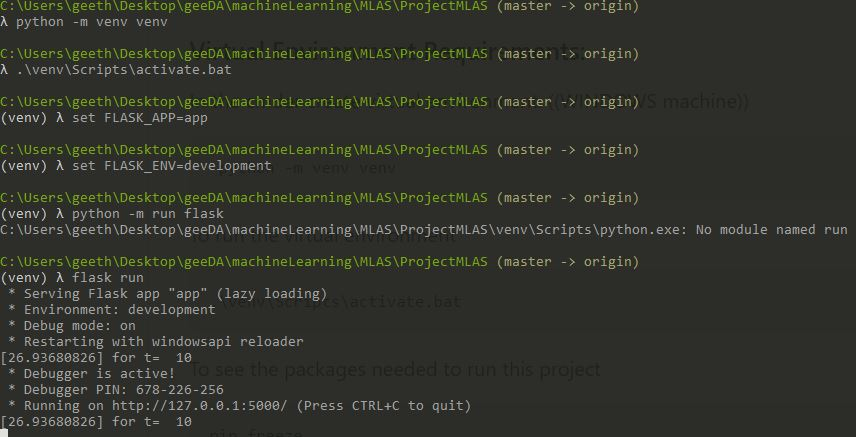

In [19]:
from IPython.display import Image 

Image("Images/flaskrun.jpg")

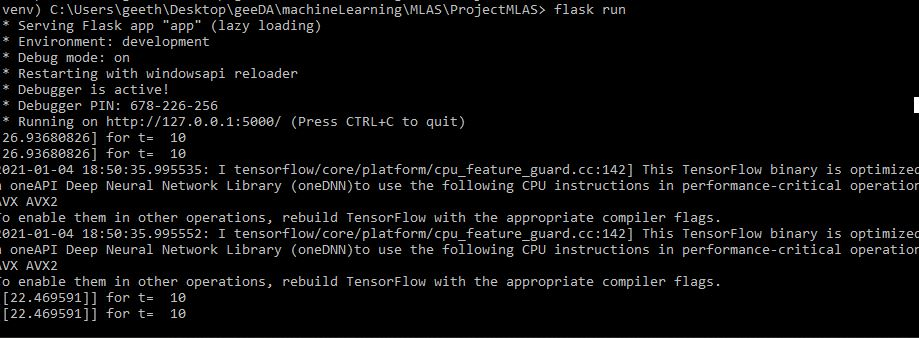

In [20]:
from IPython.display import Image 

Image("Images/flask1.jpg")

When flask runs, you shall open your Chrome browser and paste http://127.0.0.1:5000/  to see the Statis page **index.html** and also other api routes which i used here are **UNIFORM** and **NORMAL** for my application.

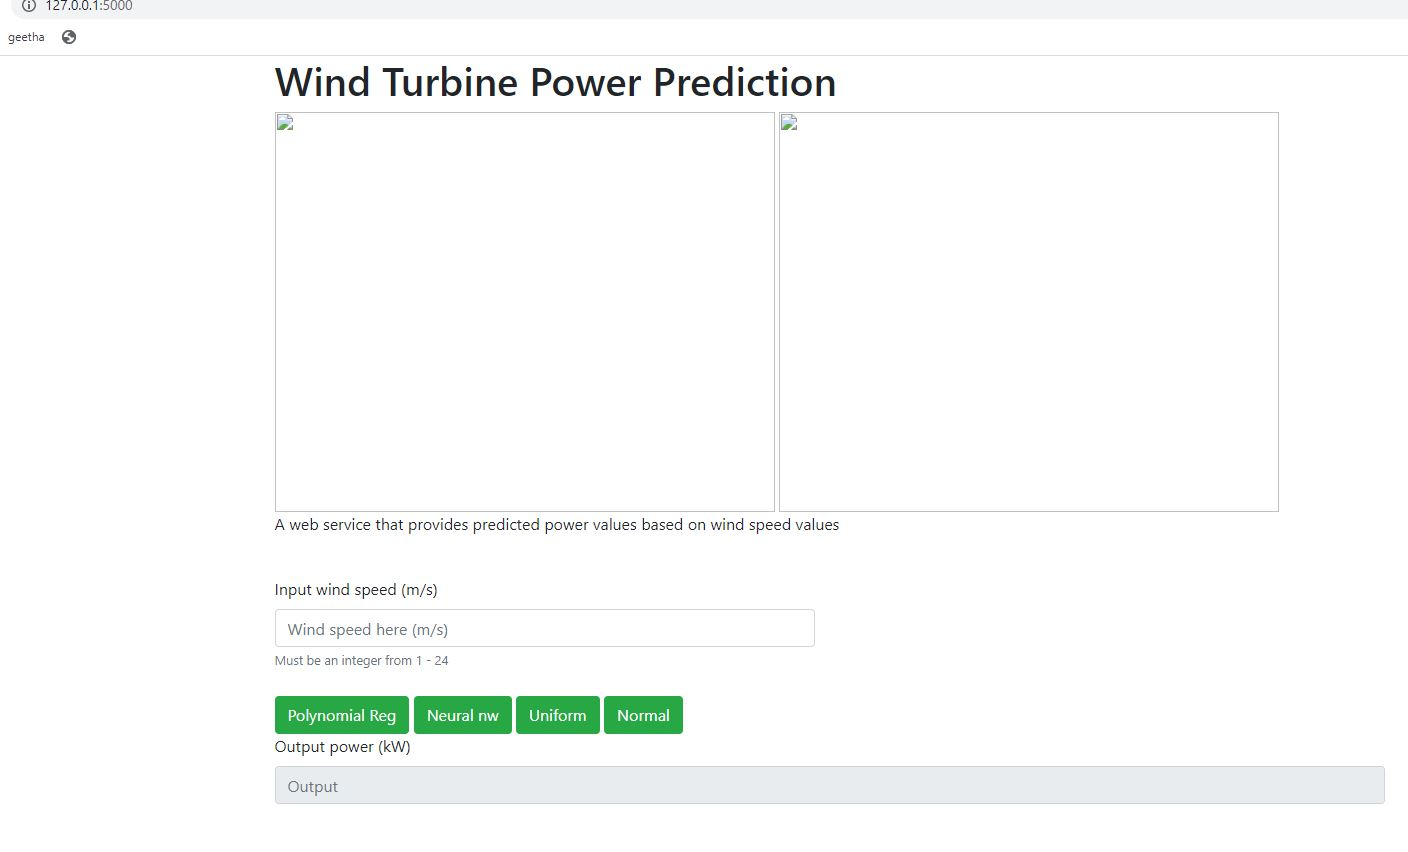

In [1]:
from IPython.display import Image 

Image("Images/runflask.jpg")

In [ ]:
Flask run doesnt show my images as I created in my index.html  in Static folder.

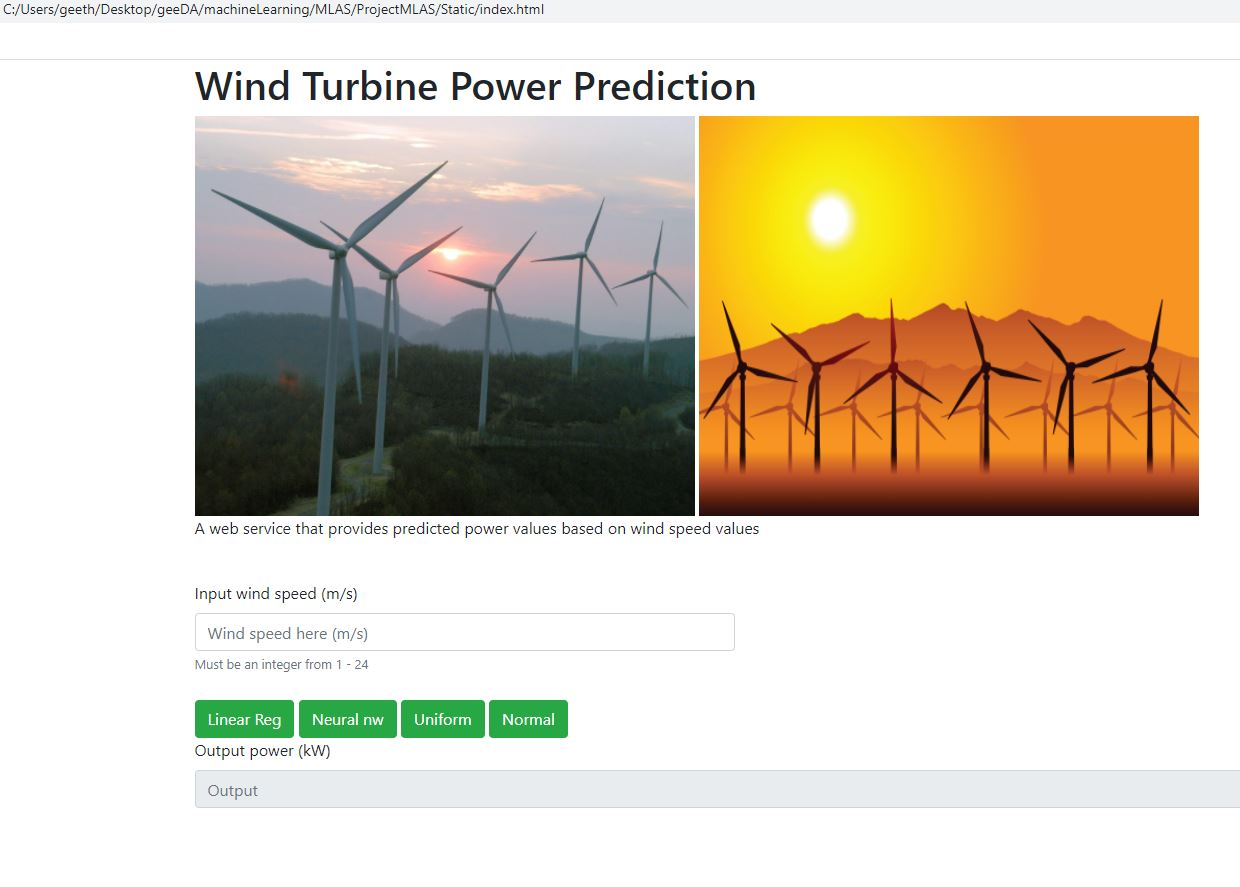

In [21]:
from IPython.display import Image 

Image("Images/indexhtml.jpg")

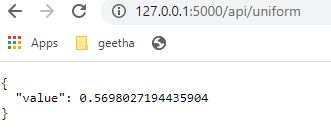

In [22]:
from IPython.display import Image 

Image("Images/Uniform.jpg")

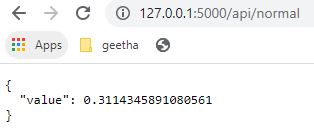

In [23]:
from IPython.display import Image 

Image("Images/normal.jpg")

## Other References:-
https://www.freecodecamp.org/news/how-to-build-a-web-application-using-flask-and-deploy-it-to-the-cloud-3551c985e492/   [last accessed on 04/01/21] 
https://www.verdict.co.uk/bigger-wind-turbines-report/